# Task 0

In [14]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Ensure necessary NLTK resources are downloaded
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/nazarlenisin/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nazarlenisin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
text = gutenberg.raw('austen-emma.txt')

In [16]:
from typing import Callable
import logging


# Introducing Interface of the Tokenizer and Stemmer
Tokenizer =  Callable[[str], list]
Stemmer = Callable[[str], str]

In [17]:
# Decorator for nltk Stemmers to follow interface of Stemmer
def StemDecorator(stemmer):
    def wrapper(*args, **kwargs):
        return stemmer.stem(*args, **kwargs)
    return wrapper

# decorate PorterStemmer
porter_stemmer = StemDecorator(PorterStemmer())

In [18]:
# function to preprocess text to its frequency distribution
def process_text(text: str, tokenizer: Tokenizer = word_tokenize,  stemmer: Stemmer = None) -> FreqDist:
    try:
        words = tokenizer(text)
        words = (word.lower() for word in words if word.isalpha())
        if stemmer: words = (stemmer(word) for word in words)
        return FreqDist(words)
    
    except Exception as e:
        logging.exception(e)

In [19]:
text_freq_dist = process_text(text)
stemmed_text_freq_dist = process_text(text, stemmer=porter_stemmer)

print('Number of tokens in text:', len(text_freq_dist))
print('Number of tokens in stemmed text:', len(stemmed_text_freq_dist))

Number of tokens in text: 6931
Number of tokens in stemmed text: 4369


In [20]:
# helper function to get most common stems and their frequency
def find_common_stems(stems_dist: FreqDist, n: int = 10) -> zip:
    if not isinstance(n, int):
        raise ValueError('n has to be integer')
    
    if not isinstance(stems_dist, FreqDist):
        raise ValueError('Stems Distribution has to be of type FreqDist')
    
    return zip(*stems_dist.most_common(n))

stems, stems_counts = find_common_stems(stemmed_text_freq_dist, 10)

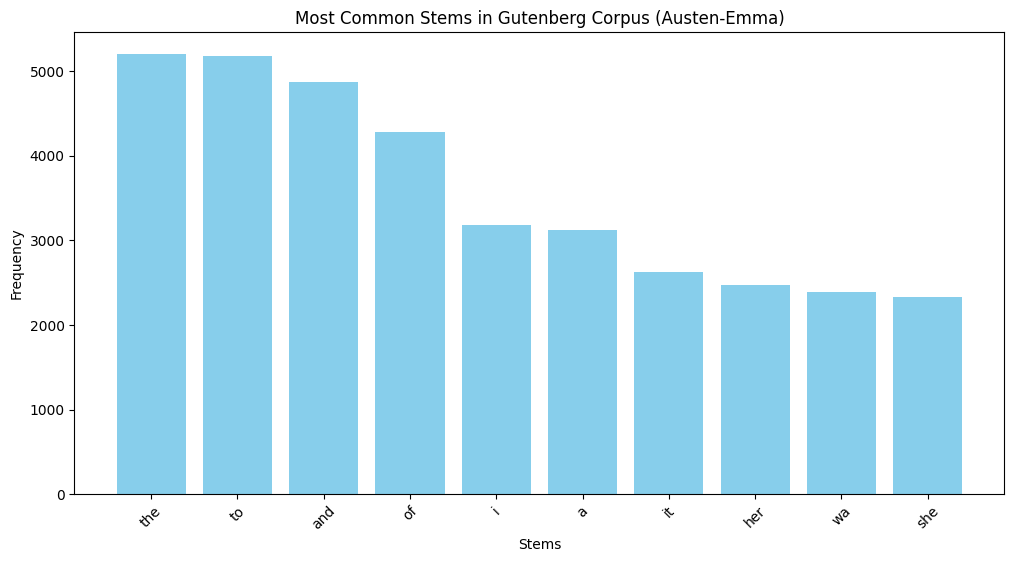

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(stems, stems_counts, color='skyblue')
plt.xlabel('Stems')
plt.ylabel('Frequency')
plt.title('Most Common Stems in Gutenberg Corpus (Austen-Emma)')
plt.xticks(rotation=45)
plt.show()

# Task 1

In [22]:
import re
from nltk.stem.api import StemmerI # StemmerI base Interface class for all nltk Stemmers
from dataclasses import dataclass


class StemUkrainian(StemmerI):
    suffixes: tuple[str] = (r'ість$', r'ого$', r'ему$', 
                            r'ими$', r'ами$', r'ях$',
                            r'ях$', r'ей$', r'ою$', 
                            r'ув$', r'ив$', r'ем$', 
                            r'ом$', r'ах$', r'ях$', 
                            r'ія$', r'єю$', r'ії$', 
                            r'є$', r'ю$', r'и$', r'і$', 
                            r'а$', r'о$', r'у$', r'я$',
                            r'є$', r'ть$', r'ти$', r'ний$', 
                            r'ного$', r'ному$', r'ними$', r'них$',
                            r'на$', r'ну$', r'ною$', r'ний$', r'но$', 
                            r'то$', r'ка$', r'ки$', r'ок$', r'ів$', r'ем$',
                            r'ом$', r'ій$', r'ої$', r'е$', r'и$', r'і$', r'ь$',
                            r'у$', r'ю$', r'я$') # tuple to reduce memory intake, because of static array
    
    def stem(self, word: str) -> str:
        
        # errors handling
        if not isinstance(word, str): 
            raise ValueError('invalid type')
        
        if not self.suffixes: 
            raise ValueError('error')
        
        for suffix in self.suffixes: # n
            if re.search(suffix, word): # k
                return re.sub(suffix, '', word) # s
        return word
    
    #  Time: O(n * k )
    #  Space: O(m)
    #  n -  amount of suffixes
    #  k - time complexity of re.search, i suppose linear through sliding window pattern
    #  s - time complexity of re.sub, i suppose linear throught sliding windo pattern
    #  m - space comsumed by new word
    
    def __repr__(self) -> str:
        return f"StemUkrainian()"

stemmer = StemUkrainian()
stemmer.stem('просто')

'прост'

# Task 2

In [23]:
qwerty_layout: dict[str, tuple[int]] = {
        'q': (0, 0), 'w': (0, 1), 'e': (0, 2), 'r': (0, 3), 't': (0, 4), 'y': (0, 5), 'u': (0, 6), 'i': (0, 7), 'o': (0, 8), 'p': (0, 9),
        'a': (1, 0), 's': (1, 1), 'd': (1, 2), 'f': (1, 3), 'g': (1, 4), 'h': (1, 5), 'j': (1, 6), 'k': (1, 7), 'l': (1, 8),
        'z': (2, 0), 'x': (2, 1), 'c': (2, 2), 'v': (2, 3), 'b': (2, 4), 'n': (2, 5), 'm': (2, 6)
    }

In [24]:
import numpy as np

class WagnerFisherAlg:
    
    def __init__(self, letters_layout : dict[str, tuple[int]] = qwerty_layout) -> None:
        self.letters_layout = qwerty_layout
        
        
    def _check_input(self, c1: str, c2: str) -> Exception | None:
        if not(isinstance(c1, str) and isinstance(c2, str)): # 1
            raise ValueError('')
        
        # Time: O(1)
        # Space: O(1)
        
        
    def _distance(self, c1: str, c2: str) -> int:
        self._check_input(c1, c2) # 1
        
        if c1 == c2:  # 1
            return 0 # 1
        
        if not c1  in self.letters_layout or not c2  in self.letters_layout: # 1
            return 2 # 1
        
        x1, y1 = self.letters_layout[c1] # 1
        x2, y2 = self.letters_layout[c2] # 1
        return np.linalg.norm([x1 - x2, y1 - y2]) # # 1
    
    # Time: O(1)
    # Space: O(1)
    
    
    def __call__(self, s1: str, s2: str) -> int:
        self._check_input(s1, s2)
        
        m, n = len(s1), len(s2) # 1
        dp = np.zeros((m + 1, n + 1)) # mn
        
        for i in range(m + 1): # m
            dp[i][0] = i # 1
            
        for j in range(n + 1): # n
            dp[0][j] = j # 1
            
        for i in range(1, m + 1): # m
            for j in range(1, n + 1): # n
                cost_sub = self._distance(s1[i - 1], s2[j - 1]) # 1
                dp[i][j] = min(
                    dp[i - 1][j] + 1,
                    dp[i][j - 1] + 1,
                    dp[i - 1][j - 1] + cost_sub
                ) # 1
        return dp[m][n] # 1
    
    # Time: O(m * n)
    # Space: O(m * n)

In [25]:
class DamerauLevenshtein(WagnerFisherAlg):
    def __call__(self, s1: str, s2: str) -> int:
        m, n = len(s1), len(s2) # 1
        dp = np.zeros((m + 1, n + 1)) # m n
        
        for i in range(m + 1): # m
            dp[i][0] = i # 1
        for j in range(n + 1): # n
            dp[0][j] = j # 1
            
        for i in  range(1, m + 1): # m
            for j in range(1, n + 1): # n
                cost_sub = self._distance(s1[i - 1], s2[j - 1]) # 1
                dp[i][j] = min(
                    dp[i - 1][j] + 1,
                    dp[i][j - 1] + 1,
                    dp[i - 1][j - 1] + cost_sub
                ) # 1
                
                if i  > 1 and j > 1 and s1[i  -  1] == s2[j - 2] and s1[i - 2] == s2[j - 1]: # 1
                    dp[i][j] = min(dp[i][j], dp[i - 2][j - 2] + cost_sub) # 1
                    
        return dp[m][n] # 1
    
    # Time: O(m * n)
    # Space: O(m * n)
    
alg_2 = DamerauLevenshtein()
alg_2('hello', 'world')

6.0

In [27]:
wagner = WagnerFisherAlg()
levensthtein = DamerauLevenshtein()

s1 = 'hello'
s2 = 'wello'
wagner(s1, s2), levensthtein(s1, s2)

(2.0, 2.0)